<a href="https://colab.research.google.com/github/Shahrukh2016/Play-store-review-analysis-EDA/blob/main/Practice_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Cleaning:**

In [1]:
# Importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
# Mounting the drive to access our dataset.
df_data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/M1_Exploratory Data Analysis/Play Store Review Analysis/Copy of Play Store Data.csv")
df_reviews= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/M1_Exploratory Data Analysis/Play Store Review Analysis/Copy of User Reviews.csv")

In [3]:
# Checking first 5 rows of the playstore dataset.
df_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2103,Pony Friends 🦄 - Beepzz racing game for kids,FAMILY,4.5,114,69M,"50,000+",Free,0,Everyone,Racing;Action & Adventure,"June 13, 2018",1.4.3,4.2 and up
774,GMAT Math Flashcards,EDUCATION,4.4,1769,Varies with device,"100,000+",Free,0,Everyone,Education,"July 11, 2018",Varies with device,Varies with device
8938,Selfie DV,TOOLS,2.8,29,14M,"1,000+",Free,0,Everyone,Tools,"April 24, 2017",2.3.26,4.0.3 and up
2393,Free Hypnosis,MEDICAL,4.2,4303,Varies with device,"100,000+",Free,0,Everyone,Medical,"September 6, 2016",Varies with device,Varies with device
9607,PokerStars Play: Free Texas Holdem Poker Game,GAME,4.6,14989,78M,"500,000+",Free,0,Teen,Card,"July 6, 2018",1.9.2,4.0.3 and up


In [4]:
# Checking first 5 rows of the user reviews dataset.
df_reviews.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
26905,Clash Royale,My main problem Supercell games way opponents ...,Positive,0.205769,0.596154
24239,CarMax – Cars for Sale: Search Used Car Inventory,NaN,NaN,NaN,NaN
58378,HD Camera - Quick Snap Photo & Video,NaN,NaN,NaN,NaN
13108,Battlelands Royale,I think game amazing addictive. My complaint w...,Negative,-0.016667,0.437500
8368,"Apartment List: Housing, Apt, and Property Ren...",Great,Positive,0.800000,0.750000


In [5]:
# Checking the maximum rows and columns available in our datasets.
df_data.shape, df_reviews.shape

((10841, 13), (64295, 5))

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [8]:
# Determining duplicate values in our play store dataset.
df_data.duplicated().sum()

483

In [9]:
# Determining duplicate values in our user review dataset.
df_reviews.duplicated().sum()

33616

In [10]:
# Dropping the duplicate values from both the datasets.
df_non_dup_data= df_data.drop_duplicates()

In [11]:
# Rechecking the shape of our play store dataset after dropping all the duplicates.
df_non_dup_data.shape

(10358, 13)

In [12]:
#Rechecking our play store dataset wheather they have any more duplicate values.
df_non_dup_data.duplicated().sum()

0

**It's good to know that we don't have more duplicate values in both the dataset but still we have some null and missing values. Let's deal with them.**

In [13]:
df_data.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2110,Transformers Rescue Bots: Disaster Dash,FAMILY,4.4,19245,25M,"1,000,000+",Free,0,Everyone,Casual;Action & Adventure,"March 28, 2018",1.3,4.1 and up
6788,LG BT Reader Plus,TOOLS,3.7,2992,585k,"500,000+",Free,0,Everyone,Tools,"February 25, 2016",2.1.11,4.1 and up
931,Netflix,ENTERTAINMENT,4.4,5456599,Varies with device,"100,000,000+",Free,0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device


In [14]:
# Defining the function 
def get_info(df):
  func_df= pd.DataFrame(index= df.columns, columns=["datatype", "total_values", "na_values", "non_na_values", "%na_values", "unique_count"])
  func_df["datatype"]= [type(i) for i in list(df.columns)]
  func_df["total_values"]= [len(df[i]) for i in list(df.columns)]
  func_df["na_values"]= [df[i].isnull().sum() for i in list(df.columns)]
  func_df["non_na_values"]= [(~df[i].isnull()).sum() for i in list(df.columns)]
  func_df["%na_values"]= [df[i].isnull().mean()*100 for i in list(df.columns)]
  func_df["unique_count"]= [len(df[i].unique()) for i in list(df.columns)]
  return func_df

In [15]:
get_info(df_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10841,0,10841,0.000000,9660
Category,<class 'str'>,10841,0,10841,0.000000,34
Rating,<class 'str'>,10841,1474,9367,13.596532,41
Reviews,<class 'str'>,10841,0,10841,0.000000,6002
Size,<class 'str'>,10841,0,10841,0.000000,462
Installs,<class 'str'>,10841,0,10841,0.000000,22
Type,<class 'str'>,10841,1,10840,0.009224,4
Price,<class 'str'>,10841,0,10841,0.000000,93
Content Rating,<class 'str'>,10841,1,10840,0.009224,7
Genres,<class 'str'>,10841,0,10841,0.000000,120


In [16]:
get_info(df_non_dup_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10358,0,10358,0.000000,9660
Category,<class 'str'>,10358,0,10358,0.000000,34
Rating,<class 'str'>,10358,1465,8893,14.143657,41
Reviews,<class 'str'>,10358,0,10358,0.000000,6002
Size,<class 'str'>,10358,0,10358,0.000000,462
Installs,<class 'str'>,10358,0,10358,0.000000,22
Type,<class 'str'>,10358,1,10357,0.009654,4
Price,<class 'str'>,10358,0,10358,0.000000,93
Content Rating,<class 'str'>,10358,1,10357,0.009654,7
Genres,<class 'str'>,10358,0,10358,0.000000,120


We are having total null values in df_non_dup_data dataset is:

*   Rating = 1465
*   Type = 1
*   Content Rating = 1
*   Current Ver = 8
*   Android Ver = 3

Since we have 0.009654%, 0.009654%, 0.077235%, 0.028963% null values in Type, Content Rating, Current Ver, Android Ver columns respectively which won't affect our results, so we can drop them.

Replacing all the null values of "Rating" column with **Mode**. Since we can not drop these values.





In [17]:
df_non_dup_data.dropna(subset=["Type","Content Rating", "Current Ver", "Android Ver"], inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
get_info(df_non_dup_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10346,0,10346,0.000000,9648
Category,<class 'str'>,10346,0,10346,0.000000,33
Rating,<class 'str'>,10346,1460,8886,14.111734,40
Reviews,<class 'str'>,10346,0,10346,0.000000,5999
Size,<class 'str'>,10346,0,10346,0.000000,457
Installs,<class 'str'>,10346,0,10346,0.000000,20
Type,<class 'str'>,10346,0,10346,0.000000,2
Price,<class 'str'>,10346,0,10346,0.000000,92
Content Rating,<class 'str'>,10346,0,10346,0.000000,6
Genres,<class 'str'>,10346,0,10346,0.000000,119


In [19]:
df_non_dup_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5839,Ay Telekom Oim,LIFESTYLE,NaN,6,13M,100+,Free,0,Everyone,Lifestyle,"February 17, 2018",1.0.2,4.1 and up
1270,Buttocks and Abdomen,HEALTH_AND_FITNESS,4.4,465,6.4M,"500,000+",Free,0,Everyone,Health & Fitness,"June 7, 2018",1.08,4.0.3 and up
880,Girly Lock Screen Wallpaper with Quotes,ENTERTAINMENT,4.2,32458,18M,"5,000,000+",Free,0,Everyone,Entertainment,"June 19, 2018",2.2,4.1 and up
4416,Jump'N'Shoot Attack,GAME,4.1,155,32M,"1,000+",Paid,$2.49,Everyone,Arcade,"May 26, 2018",1.2,4.1 and up
6425,BL 1-Click Camera,PHOTOGRAPHY,NaN,4,1.4M,100+,Paid,$3.99,Everyone,Photography,"August 18, 2016",2.0.160818,2.3 and up


In [20]:
# Checking the mode in our df_non_dup_data rating column of our dataset.
df_non_dup_data["Rating"].mode()

0    4.4
dtype: float64

In [21]:
# Converting the series object into numpy float type object.
df_non_dup_data["Rating"].mode()[0]

4.4

In [22]:
df_non_dup_non_na_data= df_non_dup_data.fillna(df_non_dup_data["Rating"].mode()[0])

In [23]:
get_info(df_non_dup_non_na_data )

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10346,0,10346,0.0,9648
Category,<class 'str'>,10346,0,10346,0.0,33
Rating,<class 'str'>,10346,0,10346,0.0,39
Reviews,<class 'str'>,10346,0,10346,0.0,5999
Size,<class 'str'>,10346,0,10346,0.0,457
Installs,<class 'str'>,10346,0,10346,0.0,20
Type,<class 'str'>,10346,0,10346,0.0,2
Price,<class 'str'>,10346,0,10346,0.0,92
Content Rating,<class 'str'>,10346,0,10346,0.0,6
Genres,<class 'str'>,10346,0,10346,0.0,119


**Hurray! We have succesfully removed all the null and duplicate values from our play store dataset. Let us now do the same thing from user review dataset.**

In [24]:
df_reviews.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
15397,"Bleacher Report: sports news, scores, & highli...",NaN,NaN,NaN,NaN
56282,Google PDF Viewer,itZz good.but side effects best I would love b...,Positive,0.595455,0.577273
14003,Best Buy,NaN,NaN,NaN,NaN
32943,Daily Yoga - Yoga Fitness Plans,NaN,NaN,NaN,NaN
18484,Buienradar - weer,crashing today. It working anymore,Neutral,0.000000,0.000000


In [25]:
df_reviews.shape

(64295, 5)

In [26]:
df_reviews.duplicated().sum()

33616

In [27]:
df_non_dup_reviews= df_reviews.drop_duplicates()

In [28]:
get_info(df_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,64295,0,64295,0.000000,1074
Translated_Review,<class 'str'>,64295,26868,37427,41.788631,27995
Sentiment,<class 'str'>,64295,26863,37432,41.780854,4
Sentiment_Polarity,<class 'str'>,64295,26863,37432,41.780854,5411
Sentiment_Subjectivity,<class 'str'>,64295,26863,37432,41.780854,4475


In [29]:
get_info(df_non_dup_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,30679,0,30679,0.000000,1074
Translated_Review,<class 'str'>,30679,987,29692,3.217184,27995
Sentiment,<class 'str'>,30679,982,29697,3.200887,4
Sentiment_Polarity,<class 'str'>,30679,982,29697,3.200887,5411
Sentiment_Subjectivity,<class 'str'>,30679,982,29697,3.200887,4475


In [30]:
df_non_dup_non_na_reviews= df_non_dup_reviews.dropna()

In [31]:
get_info(df_non_dup_non_na_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,29692,0,29692,0.0,865
Translated_Review,<class 'str'>,29692,0,29692,0.0,27994
Sentiment,<class 'str'>,29692,0,29692,0.0,3
Sentiment_Polarity,<class 'str'>,29692,0,29692,0.0,5410
Sentiment_Subjectivity,<class 'str'>,29692,0,29692,0.0,4474


In [32]:
df_non_dup_non_na_data.shape, df_non_dup_non_na_reviews.shape

((10346, 13), (29692, 5))

###*Tada! We have succesfully dropped all the null and duplicated rows from both the datasets.*

##**"Oops....It seems that our dataset contains values in improper format."**

*No worries, let's just convert the datatype of each columns into required format to deal and try to gain some good insights with it.*

###*Defining a function that replaces the "$" from "Price", "M","k" from "Size" and ",","+" from downloads to get proper plots while visualizing the datasets.*

In [33]:
#Defining a new function that helps us to get our columns n proper formats.
def Size_format(kb_mb):
  '''This Function is used for converting kb into MB.'''
  if kb_mb[-1]=="M":
    return float(kb_mb[:-1])
  elif kb_mb[-1]=="k":
    return float(float(kb_mb[:-1])/1024)
  else:
    return

def Installs_format(downloads):
  '''This function removes "+","," from the Installs column.'''
  downloads= downloads.replace("+","")
  downloads= downloads.replace(",","")
  downloads= int(downloads)
  return downloads

def Price_format(value):
  '''This function removes "$" from the Price column.'''
  value= value.replace("$","")
  value= float(value)
  return value

# Typecasting the str type to timestamp in "Latest Updated" column.
df_non_dup_non_na_data["Last Updated"]= pd.to_datetime(df_non_dup_non_na_data["Last Updated"])

In [34]:
df_non_dup_non_na_data["Size"]= df_non_dup_non_na_data["Size"].apply(lambda x: Size_format(x))

In [35]:
df_non_dup_non_na_data["Installs"]= df_non_dup_non_na_data["Installs"].apply(lambda y: Installs_format(y))

In [36]:
df_non_dup_non_na_data["Price"]= df_non_dup_non_na_data["Price"].apply(lambda z: Price_format(z))

In [37]:
df_non_dup_non_na_data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9151,Lost Journey (Dreamsky),GAME,4.5,32344,29.0,1000000,Paid,0.99,Everyone,Adventure,2016-10-21,1.3.12,3.0 and up
8779,Dr. Panda Art Class,FAMILY,4.2,1013,58.0,50000,Paid,2.99,Everyone,Education;Creativity,2017-04-26,1.7,4.0 and up
7339,"Reading Race 1b: sh, ch words",FAMILY,4.4,2,76.0,50,Paid,3.99,Everyone,Educational;Education,2016-01-08,1.01,4.0 and up
5049,iFunny :),FAMILY,4.4,503757,NaN,10000000,Free,0.00,Mature 17+,Entertainment,2018-08-02,Varies with device,Varies with device
5146,Ah! Monster,FAMILY,4.1,1998,9.8,100000,Free,0.00,Everyone,Casual,2017-06-21,4.0.0,4.0 and up
3031,Zepp Golf Swing Analyzer,SPORTS,4.4,2020,84.0,100000,Free,0.00,Everyone,Sports,2018-05-24,4.4.0,5.0 and up
7729,Roll Call News,NEWS_AND_MAGAZINES,3.7,24,10.0,5000,Free,0.00,Everyone,News & Magazines,2015-12-24,1.1,4.1 and up
1623,My Dressing - Fashion closet,LIFESTYLE,4.1,12452,NaN,500000,Free,0.00,Everyone,Lifestyle,2017-01-26,Varies with device,Varies with device
9584,Texas Hold’em Poker + | Social,GAME,3.5,4416,59.0,500000,Free,0.00,Teen,Casino,2017-01-18,2.1.7,4.0.3 and up
9517,Ek Vote,PRODUCTIVITY,5.0,43,6.2,500,Free,0.00,Everyone,Productivity,2017-11-07,1.1,4.0.3 and up


####*Hurray! Till now we have succesfully done the following tasks:*

*1. Dropped the unimportant null values from bothe the datasets.* 

*2. Dropped all the duplicate columns which are of no use while gaining insights.*

*3. Typecasted our dataset columns into proper formats('Installs' > int, 'Price' > float and 'Last Updated' > timestamp).*




##**Bravo!! Till we have done everything which involves in the phase of Data Cleaning.**

##**Let's just quickly plot the graphs which involves the important information**

###**Essential Basic Plottings:**


####**Problem 1: What are the top 10 most competing catagories in playstore ?**

**"Category" vs "Number of App"**

[Text(0, 0, 'FAMILY'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'MAPS_AND_NAVIGATION'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'HOUSE_AND_HOME'),
 Text(0, 0, 'LIBRARIES_AND_DEMO'),
 Text(0, 0, 'AUTO_AND_VEHICLES'),
 Text(0, 0, 'WEATHER'),
 Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'EVENTS'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'COMICS'),
 Text(0, 0, 'BEAUTY'),
 Text(0, 0, '1.9')]

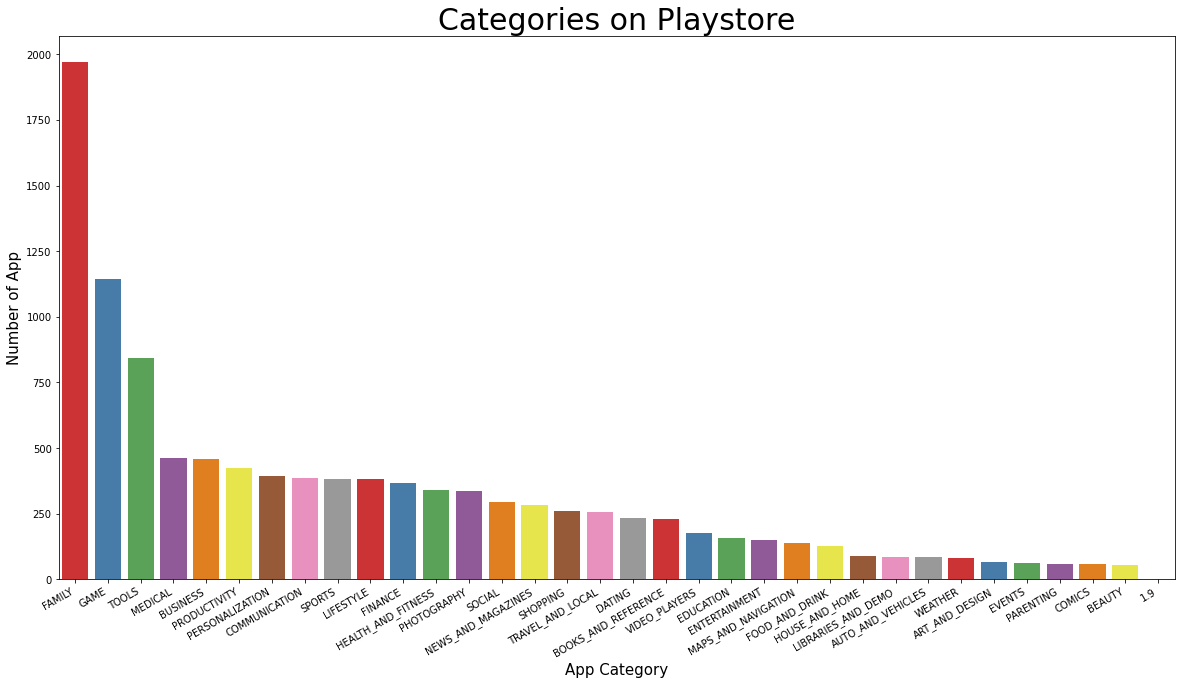

In [38]:
#"Category" vs "Number of app" bar plot.

x = df_data['Category'].value_counts().index
y = df_data['Category'].value_counts()
x_axis = []
y_axis = []
for i in range(len(x)):
    x_axis.append(x[i])
    y_axis.append(y[i])

plt.figure(figsize=(20,10))
plt.xlabel('App Category', size=15)
plt.ylabel('Number of App', size=15)
plot = sns.barplot(x = x_axis, y = y_axis,palette = "Set1")
plot.set_title("Categories on Playstore", fontsize = 30)
plot.set_xticklabels(plot.get_xticklabels(),rotation=30, horizontalalignment='right')

*We can clearly see from the above bar plot that category **"Family" contains the maximum number of apps followed by "Game", "Tools", "Medical" and "Business" in play store.** therefore, these categories will be the most competing categories in playstore.*

####**Problem 2: Which genres are the most popular and least popular in playstore ?**
**"Genres" vs "Installs"**

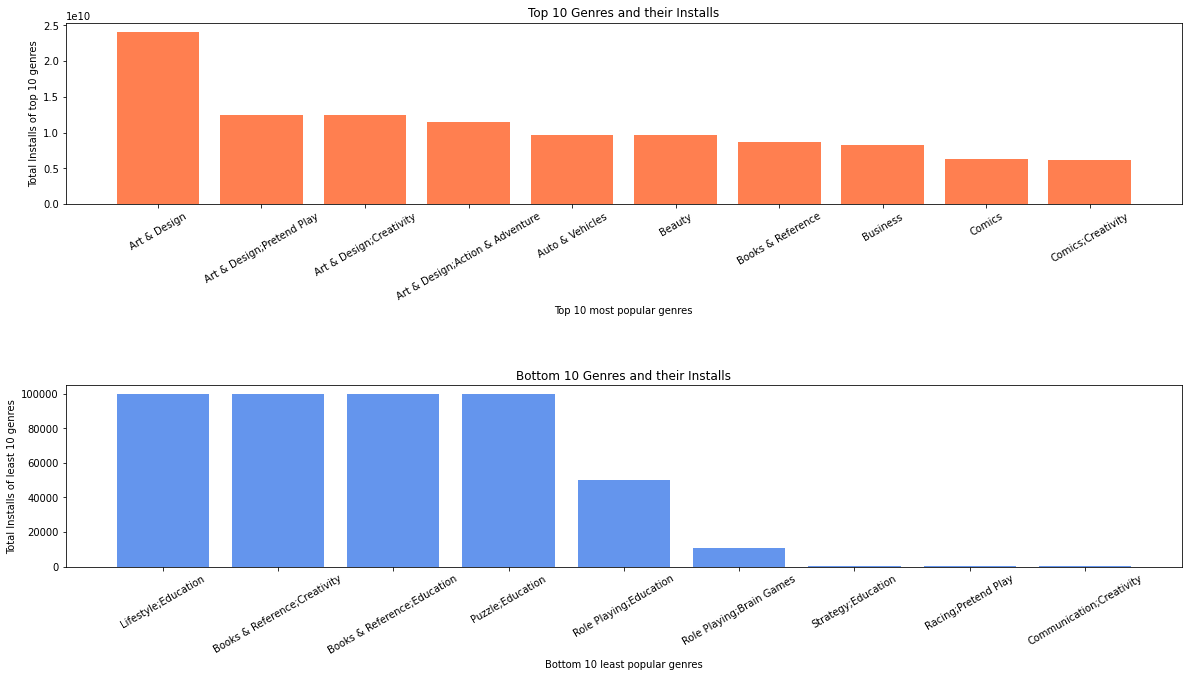

In [39]:
#First bar plot
fig = plt.figure(figsize = (20, 10))
y1= df_non_dup_non_na_data.groupby(["Genres"])["Installs"].sum().sort_values(ascending=False)[0:10]
x1= df_non_dup_non_na_data["Genres"].unique()[0:10]

plt.subplot(2,1,1)
plt.bar(x1,y1, color= "Coral")
plt.title("Top 10 Genres and their Installs")
plt.xlabel("Top 10 most popular genres")
plt.ylabel("Total Installs of top 10 genres")
plt.xticks(rotation=30)

#Second bar plot
y2= df_non_dup_non_na_data.groupby(["Genres"])["Installs"].sum().sort_values(ascending=False)[-10:-1]
x2= df_non_dup_non_na_data["Genres"].unique()[-10:-1]

plt.subplot(2,1,2)
plt.bar(x2,y2,color= "CornflowerBlue")
plt.title("Bottom 10 Genres and their Installs")
plt.xlabel("Bottom 10 least popular genres")
plt.ylabel("Total Installs of least 10 genres")
plt.xticks(rotation=30)

plt.subplots_adjust(hspace=1)

*From the above plots it can be conclude that:*

*1. **"Art and Design" is the most popular as well as competing genre** since it has maximum number of downloads(installs).*  

*2. **"Strategy;Education", "Racing;Pretend Play", and "Communcation;Creatvity" are the least popular genre** and has neglegible number of installs.*

####**Problem 3: What are the frequency distributions of Rating, Price, Last Updated, Sentiment Polarity and Sentiment Subjectivity column(Mean value range) ?**

1. **"Rating" vs "Frequency"** 

2. **"Price" vs "Frequency"**

4. **"Sentiment Polrity" vs "Frequency**

5. **"Sentiment Subjectivity" vs "Frequency"**

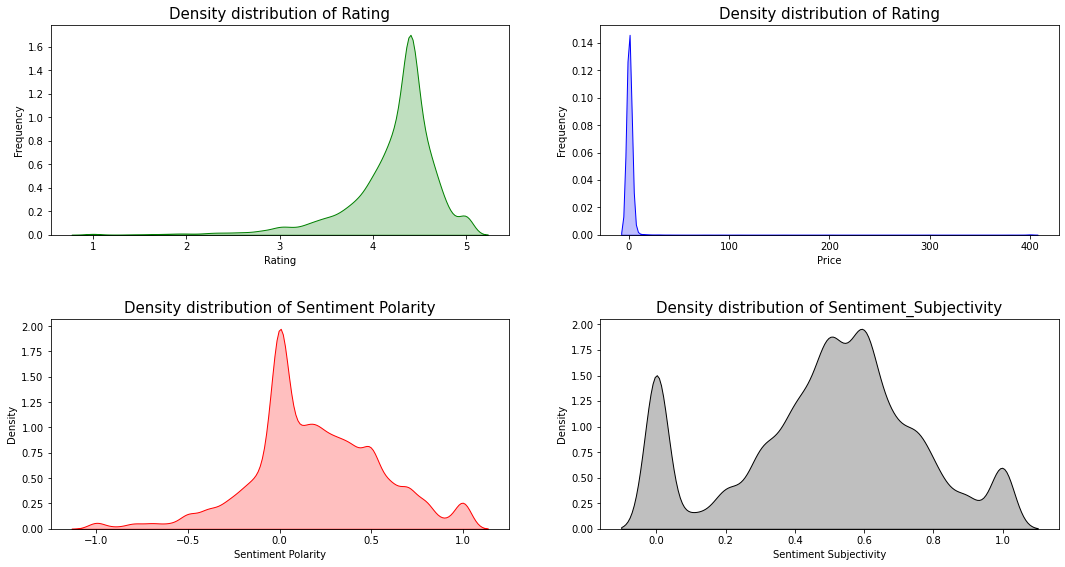

In [40]:
plt.figure(figsize=(20,10))
#First plot(Rating vs Frequency)

plt.subplot(2,2,1)
plt.xlabel("Rating")
plt.ylabel("Frequency")
sns.kdeplot(df_non_dup_non_na_data["Rating"], color="Green", shade = True)
plt.title('Density distribution of Rating',size = 15)

#Second plot(Price vs Frequency)

plt.subplot(2,2,2)
plt.xlabel("Price")
plt.ylabel("Frequency")
sns.kdeplot(df_non_dup_non_na_data["Price"], color="Blue", shade = True)
plt.title('Density distribution of Rating',size = 15)

#Third plot(Sentiment Polarity vs Frequency)

plt.subplot(2,2,3)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Density")
sns.kdeplot(df_non_dup_non_na_reviews["Sentiment_Polarity"], color="red", shade = True)
plt.title('Density distribution of Sentiment Polarity',size = 15)

#Forth plot(Sentiment Subjectivity vs Frequency)

plt.subplot(2,2,4)
plt.xlabel("Sentiment Subjectivity")
plt.ylabel("Density")
sns.kdeplot(df_non_dup_non_na_reviews["Sentiment_Subjectivity"], color="black", shade = True)
plt.title('Density distribution of Sentiment_Subjectivity',size = 15)

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

In [41]:
df_non_dup_non_na_reviews.sample(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
29525,Couch to 5K by RunDouble,I really really like app! BUT I'm disappointed...,Positive,0.163636,0.590909
39264,Ebook Reader,Great !! Thanks.,Positive,0.600000,0.475000


In [42]:
df_non_dup_non_na_data["Rating"].mean()

4.21788130678523

In [43]:
df_non_dup_non_na_data["Price"].mean()

1.0315609897544944

In [44]:
df_non_dup_non_na_reviews["Sentiment_Polarity"].mean()

0.18886801909094042

In [45]:
df_non_dup_non_na_reviews["Sentiment_Subjectivity"].mean()

0.4909304503814963

*From the above density distribution plots we can say that:*
1. **Average rating of given dataset is 4.2178813 on play store.**
2. **The Mean price of our dataset is 1.0315609 which means that the majority of the apps are free (0$) on google play store.**
3.  **The polarity score lies in the range of[-1,1]. Anything below a score of -0.05 we tag as negative and anything above 0.05 we tag as positive Sentiment score.** Here we can see from our calculations and the Sentiment Polarity Desnsity distribution graph that the **Mean Sentiment Polarity Score is 0.18886801** which is resembles a good average sentiment score(Majority of the users liking the apps).
4.**The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.** As per our analysis and plotted graph the **Mean Sentiment Subjectivity Score is 0.49093045.** That means around 50% users are sharing personal opinion while others 50% are just sharing the factual information in reviews.

####**Problem 3: Does last update year affects the average rating ?**

**"Last Updated" vs "Rating"**

Text(0, 0.5, 'Average Rating')

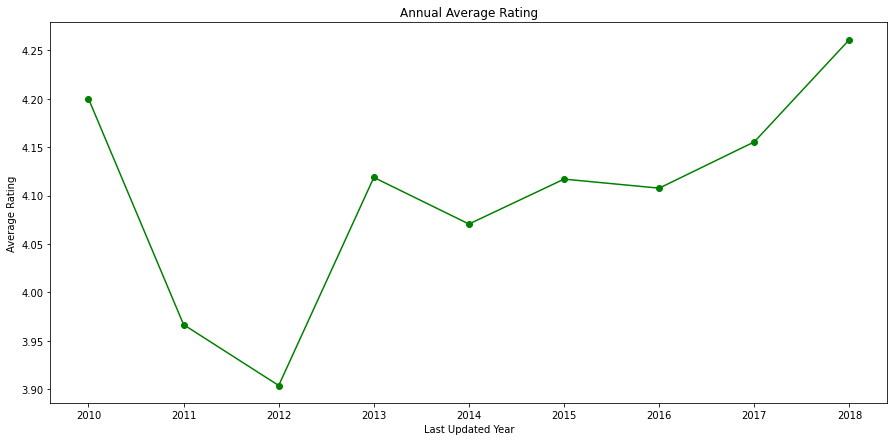

In [46]:
#Plotting line graph yearwise to check average year rating.

plt.figure(figsize=(15,7))
x= sorted(list(set([i.year for i in list(df_non_dup_non_na_data["Last Updated"])])))
y= list(df_non_dup_non_na_data.groupby([i.year for i in list(df_non_dup_non_na_data["Last Updated"])])["Rating"].mean())
plt.plot(x,y, "o-g")
plt.title("Annual Average Rating")
plt.xlabel("Last Updated Year")
plt.ylabel("Average Rating")

Text(0, 0.5, 'Rating')

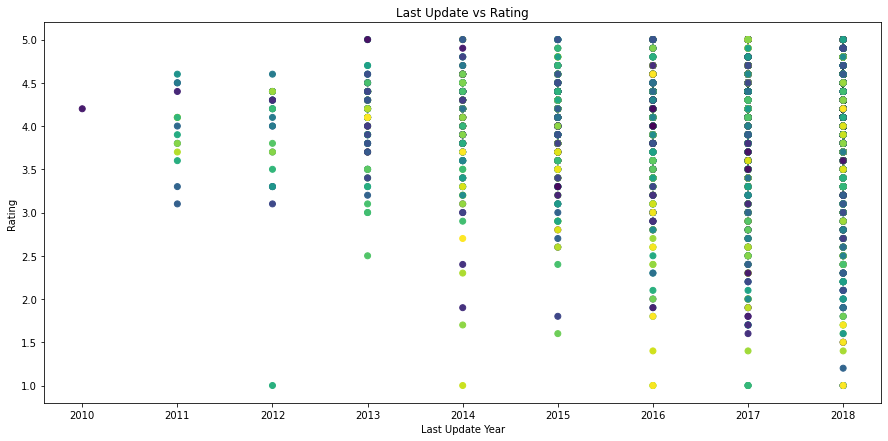

In [47]:
# Plotting scatter plot to visualize how rating affect with app last updated year.
fig = plt.figure(figsize = (15, 7))

x= [i.year for i in list(df_non_dup_non_na_data["Last Updated"])]
y= [j for j in list(df_non_dup_non_na_data["Rating"])]
colours= np.random.randint(0,100,(df_non_dup_non_na_data.shape[0]))

plt.scatter(x,y, c=colours)
plt.title("Last Update vs Rating")
plt.xlabel("Last Update Year")
plt.ylabel("Rating")

*From this line plot we have concluded that:*
1. Average **app rating is gradually increasing after 2016.** That means apps that have regular updates have higher average ratings.
2. The **graph is falling from 2010 to 2012.** This may be due to bad user experience, people are started giving poor ratings due to non regular updates or many other reasons too.

####**Probblem 4: What are the percentage of paid and free apps ?**
**"Pie plot of Type column"**

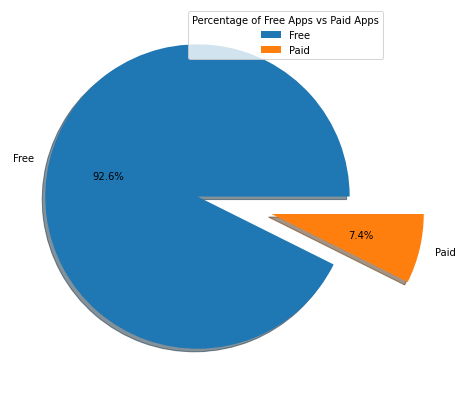

In [70]:
#plotting pie chart for determining the percentage.

plt.pie(df_non_dup_non_na_data["Type"].value_counts(), labels= df_non_dup_non_na_data["Type"].unique(),autopct='%1.1f%%', shadow= True, explode=[0.0,0.5])
plt.legend(title = "Percentage of Free Apps vs Paid Apps")

We all know that the majority of the audience prefer to use free apps instead of paid one. So we have created the pie chart to determine the percentage of the paid and free apps that playstore have. 

We can clearly see that there are only **7.4% paid apps** available on play store and the rest **92.6% are free.**


####**Problem 5: Determine the outliers in the rating column ?**

**"Box plot of Rating column"**

In [49]:
df_non_dup_non_na_data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [50]:
df_non_dup_non_na_data.groupby(["Category", "App"])["Rating"].mean()

Category        App                                                                              
ART_AND_DESIGN  350 Diy Room Decor Ideas                                                             4.5
                3D Color Pixel by Number - Sandbox Art Coloring                                      4.4
                AJ Styles HD Wallpapers                                                              4.8
                AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper                                    4.0
                Ai illustrator viewer                                                                3.4
                                                                                                    ... 
WEATHER         Yahoo Weather                                                                        4.4
                Yahoo! Weather for SH Forecast for understanding the approach of rain clouds Free    4.2
                Yandex.Weather                                

{'whiskers': [<matplotlib.lines.Line2D at 0x7f90cbf0f790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f90cea816d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f90cea5d150>],
 'medians': [<matplotlib.lines.Line2D at 0x7f90cea59310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f90cea59450>],
 'means': []}

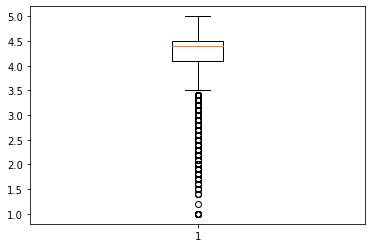

In [51]:
pq= df_non_dup_non_na_data.groupby(["Category", "App"])["Rating"].mean()
# plt.subplot().boxplot(x)

fig, ax = plt.subplots()
ax.boxplot(pq)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f90cc072090>,
 'caps': [<matplotlib.lines.Line2D at 0x7f90d09c7a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f90cc0e32d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f90cc093a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f90cc08b910>],
 'means': []}

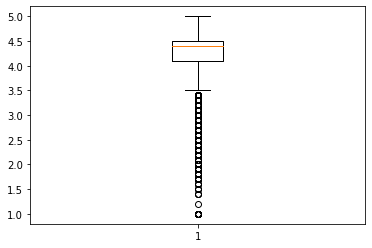

In [52]:
# Creating the box matplotlb boxplot and determining the outliers in rating column. 
p= df_non_dup_non_na_data["Rating"]
plt.boxplot(p)

An outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.

While analysing our dataset I'm very curious to know what are the outliers in rating columns and for that purpose I've plotted the box plot.
After analysing the box plot we came to a conclusion that **below 3.5 ratings are the outliers.**

###**Some Advanced Plottings**

####**Problem 4: Is there any correlation between Sentiment polarity/Sentiment subjectivity with Installs/Rating/Reviews ?**

**"Heatmap of merged datasets"**

To determine the coorelation between both the datasets first we have to merge both the datasets into a single dataframe.

In [53]:
# Merging both the dataset for determining correlation.
df_merge= pd.merge(df_non_dup_non_na_data, df_non_dup_non_na_reviews, on="App", how="inner")
df_merge.corr()

,Rating,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.200414,0.008485,-0.018775,0.075466,0.071492
Size,0.200414,1.000000,0.252087,-0.031521,-0.188011,0.007689
Installs,0.008485,0.252087,1.000000,-0.023349,-0.053921,-0.004637
Price,-0.018775,-0.031521,-0.023349,1.000000,0.022010,-0.000581
Sentiment_Polarity,0.075466,-0.188011,-0.053921,0.022010,1.000000,0.244832
Sentiment_Subjectivity,0.071492,0.007689,-0.004637,-0.000581,0.244832,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore data and User review data')

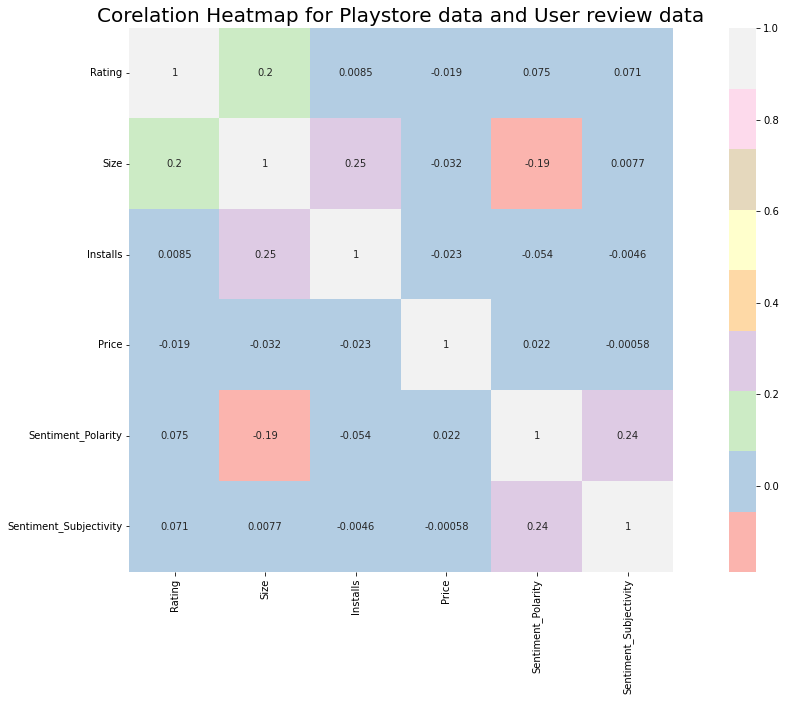

In [54]:
#Creating seaborn heatmap for better visual representation of correlation.
plt.figure(figsize = (20,10))
sns.heatmap(df_merge.corr(),annot= True,cmap=sns.color_palette('Pastel1'),square=True)
plt.title('Corelation Heatmap for Playstore data and User review data', size=20)

We are curious how both the data frames are related to each other. Is there any positive or negative correlation between them? For that purpose we have merged both the dataframes for obtaining results and we have observed that:

1. **Size and sentiment polarity are negatively correlated(-0.19).** There may be a reason when the size of an app increases people start disliking the app because it consumes more storage, takes more RAM and needs a high speed connection for its execution.

2. There is a **positive correlation between reviews and number of installs(0.56)**  because as the reviews increase, people start noticing the app and install them.

3. There is a **slightly positive correlation(0.24) between sentiment polarity and sentiment subjectivity** that means if users share the positive reviews (sentiment polarity) then there are many chances that users are sharing their personal opinion and not factual information(Sentiment Subjectivity).


####**Problem 5: What are the top 5 apps that have generated the highest revenue ?**

**"Bar plot of top 5 paid apps"**

In [55]:
df_non_dup_non_na_data.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8111,Phone Clean Best Speed Booster,PRODUCTIVITY,4.5,81502,NaN,1000000,Free,0.0,Everyone,Productivity,2018-03-29,Varies with device,Varies with device
2480,Thyroid Nodules,MEDICAL,4.4,0,20.0,10,Free,0.0,Everyone,Medical,2018-07-14,1.0,4.3 and up
6381,BK Suraj bhai,LIFESTYLE,4.6,9,3.1,1000,Free,0.0,Everyone,Lifestyle,2017-12-08,2.2,4.1 and up


In [56]:
df_non_dup_non_na_data[df_non_dup_non_na_data["Price"]!=0.0].sort_values(by=["Price"], ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300000,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6,1.500000,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
5359,I am rich(premium),FINANCE,3.5,472,0.942383,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.700000,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.800000,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,Watch Face BW Inter,PERSONALIZATION,3.1,112,8.800000,1000,Paid,0.99,Everyone,Personalization,2017-04-26,2.1.7,4.3 and up
6766,Little Magnet BT Pro,TOOLS,4.6,251,3.800000,1000,Paid,0.99,Everyone,Tools,2018-08-05,4.1.4,4.2 and up
6732,BS Match Maker Premium,TOOLS,4.4,3,0.311523,10,Paid,0.99,Everyone,Tools,2018-07-10,1.11.2,5.0 and up
6675,Infinity Dungeon VIP,FAMILY,4.3,21804,44.000000,1000000,Paid,0.99,Everyone 10+,Role Playing,2018-07-03,2.6.6,2.3 and up


In [57]:
x_axis= df_non_dup_non_na_data[df_non_dup_non_na_data["Price"]!=0.0].sort_values(by=["Price"], ascending=False)[0:5]["App"]
x_axis

4367    I'm Rich - Trump Edition
4197      most expensive app (H)
5359          I am rich(premium)
5362               I Am Rich Pro
5351                   I am rich
Name: App, dtype: object

In [58]:
y_axis= df_non_dup_non_na_data[df_non_dup_non_na_data["Price"]!=0.0].sort_values(by=["Price"], ascending=False)[0:5]["Price"]
y_axis

4367    400.00
4197    399.99
5359    399.99
5362    399.99
5351    399.99
Name: Price, dtype: float64

In [59]:
installs= df_non_dup_non_na_data[df_non_dup_non_na_data["Price"]!=0.0].sort_values(by=["Price"], ascending=False)[0:5]["Installs"]
installs

4367     10000
4197       100
5359      5000
5362      5000
5351    100000
Name: Installs, dtype: int64

Here we are trying to find the total revenue generated by the top paid app.


For this purposee are using the formula,

**TOTAL REVENUE GENERATED= PRICE*INSTALLS**

In [60]:
total_rev= pd.array(y_axis)*pd.array(installs)
total_rev_sorted= sorted(total_rev, reverse= True)
total_rev_sorted

[39999000.0, 4000000.0, 1999950.0, 1999950.0, 39999.0]

In [61]:
c = ['red', 'green', 'orange', 'blue', 'black']

Text(0, 0.5, 'Revenue')

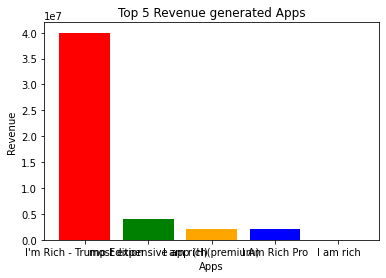

In [62]:
plt.bar(x_axis, total_rev_sorted, color=c)
plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Top 5 Revenue generated Apps')
plt.xlabel('Apps')
plt.ylabel('Revenue')

From the above bar plot we can clearly see that:

**"I'm Rich-Trump Edition" app has generated the maximum revenue** till now and followed by **"most expensive app (H)", "I am rich(premium)", "I Am Rich Pro", "I am rich".**





##**Conclusion**


* Reviews and installs share positive correlation while price and rating share
negative correlation.
* Art and design have the most number of installs.
* Developing apps within Family and Lifestyle categories can be aimed for more profit i.e high revenue .
* 61% of people have positive sentiments while approx 15% reacted negatively which is quite low in comparison(Rest are Neutral).
* Compared with Free and paid apps, 92.12% apps are Free and 7.81% apps are paid.
* As Everyone content rating contains all age group people , it has maximum i.e 81.80%  apps.
* Maximum number of apps belong to the Family , Game and Tools category.
* The category Game is a potential unsaturated space for all developers, as it has a maximum number of installs.
* People love to download apps from Tools , Entertainment , Education , Business and medical genres.
* Average rating of apps on the play store is 4.17 which is quite good.
Users prefer to pay for apps that are light weighted.
* Paid apps that are higher in size may not perform well in the market.
Users tend to download a given app more if it has been reviewed by a large number of people.
* People tend to review harsher reviews for paid apps.
* There is a positive correlation between installs and rating. 
* To develop an app which results with high rating needs to get updated with the latest version keeping it optimally sized.
* It’s good to develop a free app and have a content rating for everyone.